# Тематическое моделирование

В предыдущих сериях:

1) Сделали обычный процессинг - столбец `cleaned_text`
2) Сделали лемматизацию - `lemmatized_text`
3) По lemmatized_text сделали селекцию от 6 слов и больше


In [1]:
# 1
import pandas as pd

import yaml
import pathlib
ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

DATA_PATH = ROOT / config['api']['DATA_PATH']

In [2]:
# 2

cm_df = pd.read_csv(DATA_PATH / 'comment' / 'comments_text.csv', sep='\t')

cm_df


,id,snippet.videoId,snippet.textDisplay,snippet.textOriginal,snippet.authorDisplayName,snippet.parentId,cleaned_text,lemmatized_text
0,UgyKlKuQTfZlkw5sqeN4AaABAg,AAjsSrjZXsw,"Люди тупые, они не понимают, что оригинал стои...","Люди тупые, они не понимают, что оригинал стои...",Елена Марьина,-1,"Люди тупые, они не понимают, что оригинал стои...",человек тупой понимать оригинал стоять офигенн...
1,UgxQi90tx9SVF0IauDN4AaABAg,AAjsSrjZXsw,Не понимаю маниакального желания покупать коре...,Не понимаю маниакального желания покупать коре...,Glapfira Nikolaevna,-1,Не понимаю маниакального желания покупать коре...,понимать маниакальный желание покупать корейск...
2,UgwYIO4Dwr8lwOl5_jl4AaABAg,AAjsSrjZXsw,Пару лет назад на Озон купила духи D&G The One...,Пару лет назад на Озон купила духи D&G The One...,Гурия Мирзаева,-1,Пару лет назад на Озон купила духи D&G The One...,пара год назад озон купить дух d g the one жен...
3,UgxvyL4Z2XXYCvnraL54AaABAg,AAjsSrjZXsw,"Я дико извиняюсь, но слово контрофакт, если я ...","Я дико извиняюсь, но слово контрофакт, если я ...",thefallensun_,-1,"Я дико извиняюсь, но слово контрофакт, если я ...",дико извиняться слово контрофакт ошибаться выл...
4,Ugwwha8cCeWK74_460h4AaABAg,AAjsSrjZXsw,Вайлдбериз вообще никого и ничего не уважает и...,Вайлдбериз вообще никого и ничего не уважает и...,Наталья Пирогова,-1,Вайлдбериз вообще никого и ничего не уважает и...,вайлдбериз вообще никто ничто уважать далеко э...
...,...,...,...,...,...,...,...,...
41806,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kODjmNACUy,boB2LEXG_zA,Марципану можно придать любую форму-...батончи...,Марципану можно придать любую форму-...батончи...,Nadeschda Schmunk,Ugwz6GshlUZMMumE9n54AaABAg,Марципану можно придать любую форму-...батончи...,марципан придавать любой форма батончик шарик ...
41807,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOAgUwU2Jj,boB2LEXG_zA,@Elena CamilleriУ вас итальянская фамилия...в ...,@Elena CamilleriУ вас итальянская фамилия...в ...,Nadeschda Schmunk,Ugwz6GshlUZMMumE9n54AaABAg,CamilleriУ вас итальянская фамилия...в Италии...,camilleriу итальянский фамилия италия марципан...
41808,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOABWk8eEa,boB2LEXG_zA,и вообще невкусный... я только батончики марци...,и вообще невкусный... я только батончики марци...,Марина Марина,Ugwz6GshlUZMMumE9n54AaABAg,и вообще невкусный... я только батончики марци...,вообще невкусный батончик марципановый шоколад...
41809,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kO9mW3prUk,boB2LEXG_zA,А у нас это каштаны называют и кулинарные изде...,А у нас это каштаны называют и кулинарные изде...,Elena Camilleri,Ugwz6GshlUZMMumE9n54AaABAg,А у нас это каштаны называют и кулинарные изде...,это каштан называть кулинарный изделие миндаль...


## Оценка токенов

In [3]:
# 3 Токенизация и
from nltk import word_tokenize

all_text = [word_tokenize(line) for line in cm_df.lemmatized_text.values]

from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))

print('Всего токенов:', fd.N())

for i in fd.most_common(10):
    print(i)

Всего токенов: 671325
('очень', 10588)
('это', 9672)
('косметика', 8843)
('спасибо', 8360)
('кожа', 7743)
('видео', 7236)
('корейский', 6591)
('крем', 5917)
('ваш', 5019)
('весь', 4687)


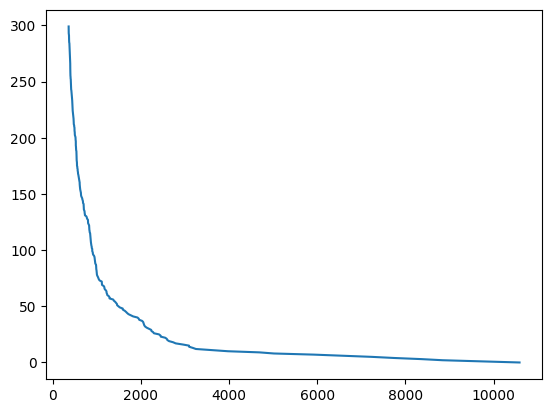

In [4]:
# 4

import matplotlib.pyplot as plt

freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

## Old Fashioned

In [5]:
test_df = cm_df.sample(5000)

In [6]:
# 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorization_params = {
    'ngram_range' : (1,2), # Токены и словосочетания
    'max_df': 0.95, # Токен не может быть встречаться чаще, чем в 95% текстов
    'min_df': 5, # Токен не может быть встречаться чаще, чем в 0.01% текстов
    'analyzer': 'word'
}

# Векторизация по частотам
cnt_vect = CountVectorizer(**vectorization_params)
# Векторизация по метрике TFIDF
tfidf = TfidfVectorizer(**vectorization_params)


In [7]:
# 6 Преобразование

cnt_m_sparse = cnt_vect.fit_transform(test_df['lemmatized_text'])
tfidf_m_sparse = cnt_vect.fit_transform(test_df['lemmatized_text'])

print('Размер разряженной матрицы', cnt_m_sparse.shape)

Размер разряженной матрицы (5000, 3066)


In [8]:
token_names = list(cnt_vect.vocabulary_.keys())

len(token_names)

3066

In [9]:
# 7 Ма
# Извлекаем какие токены мы берем
token_names = list(cnt_vect.vocabulary_.keys())

# подставляем их, чтобы просмотреть матрицу частот
cmatrix = pd.DataFrame.sparse.from_spmatrix(cnt_m_sparse, columns=token_names)
cmatrix.head()

,наличие,свободный,время,уход,сестра,регистрация,компания,атомить,сказать,пожалуйста,...,свой видео,высыпать,перегружать,пожалуйста заказывать,упаковывать,кожа чувствительный,заказывать озон,множество,зона вокруг,попытаться
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from randan.descriptive_statistics import ScaleStatistics

token_sum = pd.DataFrame(cmatrix.sum(), columns=['Токены_в_корпусе'])
token_per_doc  = pd.DataFrame(cmatrix.T.sum(), columns=['Токен_на_документ'])

ss = ScaleStatistics(token_sum,
                     variables=['Токены_в_корпусе'])

ss = ScaleStatistics(token_sum,
                     variables=['Токены_в_корпусе'])


SCALE STATISTICS SUMMARY
------------------



AttributeError: 'Styler' object has no attribute 'set_precision'

In [ ]:
# Снижение размерности

In [ ]:
from randan.dimension_reduction import PCA

pca = PCA()

pca = pca.fit(cmatrix)

In [ ]:
pca = PCA(n_components=443, rotation='varimax')
pca = pca.fit(cmatrix, show_results = True)

In [ ]:
component_loading_rotated = pca.component_loadings_rotated
component_loading_rotated.to_csv(DATA_PATH / 'comment/component_loadings_rotated.xlsx')
component_loading_rotated

In [ ]:
scores = pca.transform(test_df)
scores = pd.concat([cmatrix[['snippet.textOriginal', 'Предобработанный текст']], scores], axis =1)
scores.to_csv(f'{path}\\scores.xlsx')
scores

In [ ]:
loadings_treshold = 0.50
n_token = 15
n_docs = 15

summary = pandas.DataFrame()
errors =[]
for i in range [1:]:
    try:
        print(f'Topic PC{i}_vrmx')

        data = scores[f'PC{i}_vrmx']
        data.index = scores['snippet.textOriginal']
        plt.figure(figsize=(8, 6))
        plt.hist(data.dropna(), color = 'grey')
        plt.title(f"Distribution{data.name}")
        plt.xlable (f'{data name}')
        plt.ylable ('Frequency');

        plt.figure(figsize=(8, 6))
        plt.hist(data.dropna())
        plt.title(f"Distribution{data.name}")
        plt.xlable ([])
        plt.ylable (f'{data.name}')
        plt.show()

        topic_tokens = pd.concat([data[data.abs() > loadings_treshold].sort_values(ascending = False).head(n_tokens),
                                     data[data.abs() > - loadings_treshold].sort_values().head(n_tokens)])
        display(f'Токены на полюсах топика PC{i}_vrmx', topic_tokens)

        summary_additional = pd.DataFrame()
        summary_plus = pd.DataFrame()
        if len(data[data > loadings_treshold].sort_values(ascending = False).head(n_tokens))>0:
            summary_plus = topic_docs[topic_docs[f'PC{i}_vrmx']>0].round(3)
            summary_plus.loc[:,'Topic'] = i
            summary_plus.loc[:,'Токены'] = ','.join(list(data[data>loadings_treshold].sort_valoues(ascending = False).head(n_tokens).index))
            summary_plus.loc[:,'Токны_mean_loading'] = data[data>loadingloadings_treshold].sort_valoues(ascending = False).head(n_tokens).mean()
            summary_plus.loc[:,'Релевантность_теме_исследования']=''
            summary_plus.loc[:,'Название_топика'] =''

        summary_minus = pd.DataFrame()
        if len(data[data < - loadings_treshold].sort_valoues(ascending = False).head(n_tokens))>0:
            summary_minus = topic_docs[topic_docs[f'PC{i}_vrmx']<0].round(3)
            summary_minus.loc[:,'Topic'] = i
            summary_minus.loc[:,'Токены'] = ','.join(list(data[data>loadings_treshold].sort_valoues(ascending = False).head(n_tokens).index)
            summary_minus.loc[:,'Токны_mean_loading'] = data[data>loadingloadings_treshold].sort_valoues(ascending = False).head(n_tokens).mean()
            summary_minus.loc[:,'Релевантность_теме_исследования'] = ''
            summary_minus.loc[:,'Название_топика'] = ''

        summary_additional = pd.concat([summary_plus,summary_minus])
        summary_additional.columns = ['Текс_на_предобработку',
                                     'scores',
                                     'Topic',
                                     'Токены',
                                     'Токны_mean_loading',
                                     'Название_топика']
        summary = pd.concat([summary,summary_additional])
    except:
        print(f'Ошибка при обработке топика {i}')
        errors.append(i)
    

In [ ]:
errors

In [ ]:
summary.to_exel(f'Топики.xlsx')